In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

[*********************100%***********************]  1 of 1 completed


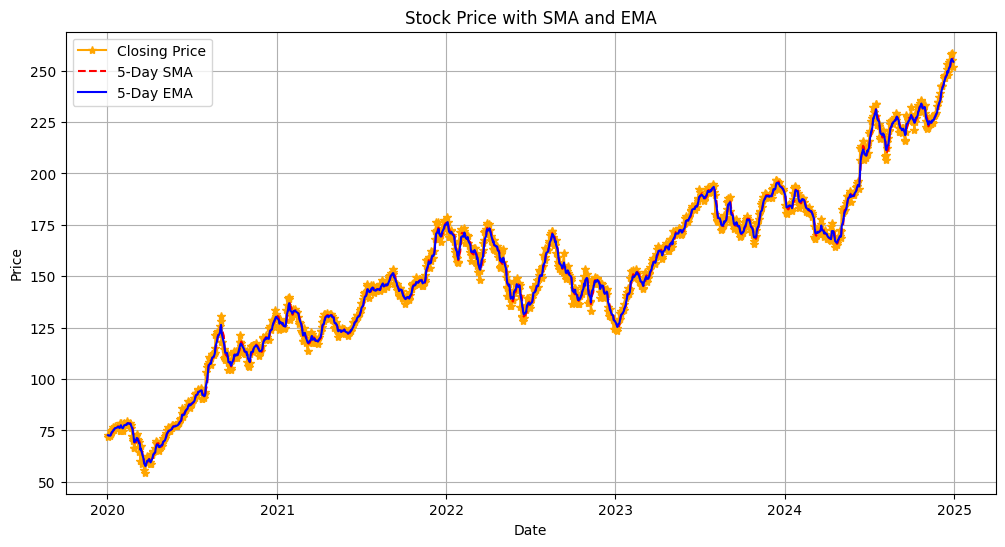

In [8]:
def fetch_and_plot_data(ticker, start_date, end_date, window_size):
    try:
        data = yf.download(ticker, start=start_date, end=end_date)
        data = data[['Close']]
        df = pd.DataFrame(data)

        df['SMA'] = df['Close'].rolling(window=window_size).mean()
        df['EMA'] = df['Close'].ewm(span=window_size, adjust=False).mean()

        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df['Close'], label='Closing Price', marker='*', color='orange')
        plt.plot(df.index, df['SMA'], label=f'{window_size}-Day SMA', linestyle='--', color='red')
        plt.plot(df.index, df['EMA'], label=f'{window_size}-Day EMA', linestyle='-', color='blue')
        plt.title('Stock Price with SMA and EMA')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid()
        plt.show()
    except Exception as e:
        print("Error fetching data:", e)

ticker_input = widgets.Text(description='Ticker:')
start_date_input = widgets.DatePicker(description='Start Date:')
end_date_input = widgets.DatePicker(description='End Date:')
window_size_input = widgets.IntSlider(value=1, min=1, max=50, step=1, description='Window Size:')
compute_button = widgets.Button(description='Compute')

def on_compute_clicked(b):
    fetch_and_plot_data(ticker_input.value, start_date_input.value.strftime('%Y-%m-%d'),
                        end_date_input.value.strftime('%Y-%m-%d'), window_size_input.value)

compute_button.on_click(on_compute_clicked)

display(widgets.VBox([
    widgets.HBox([ticker_input]),
    widgets.HBox([start_date_input]),
    widgets.HBox([end_date_input]),
    widgets.HBox([window_size_input]),
    widgets.HBox([compute_button]),
]))